
# پروژه جستجوی مسیر پک‌من

در این پروژه، شما باید الگوریتم A* و یک تابع هیوریستیک مناسب (مثل فاصله منهتن) را پیاده‌سازی کنید تا پک‌من بتواند در یک محیط بازی دوبعدی ساده، مسیر بهینه برای رسیدن به غذا را پیدا کند. بخش‌هایی از کد به صورت آماده فراهم شده و تنها قسمت‌هایی که مربوط به منطق جستجو هستند باید توسط شما تکمیل شوند.

## محیط بازی
محیط بازی به صورت یک ماتریس دو‌بعدی تعریف شده که شامل:
- `#` : دیوار (قابل عبور نیست)
- `.` : مسیر آزاد (قابل عبور)
- `P` : موقعیت اولیه پک‌من
- `F` : موقعیت غذا

## وظایف اصلی شما:
1. پیاده‌سازی الگوریتم A* در تابع `a_star_search`.
2. نوشتن یک تابع هیوریستیک admissible (مثلاً فاصله منهتن) در `manhattan_heuristic`.

هدف این است که پک‌من بتواند با استفاده از الگوریتم A* و تابع هیوریستیک، کوتاه‌ترین مسیر ممکن را از موقعیت فعلی‌اش به غذا پیدا کند.


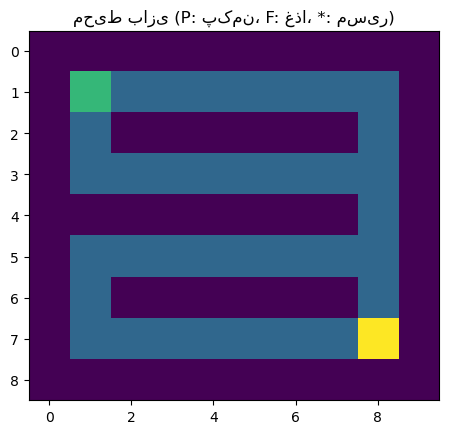

اجرای a_star_search...
path found: [(1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (2, 8), (3, 8), (4, 8), (5, 8), (6, 8), (7, 8)]
طول مسیر: 14


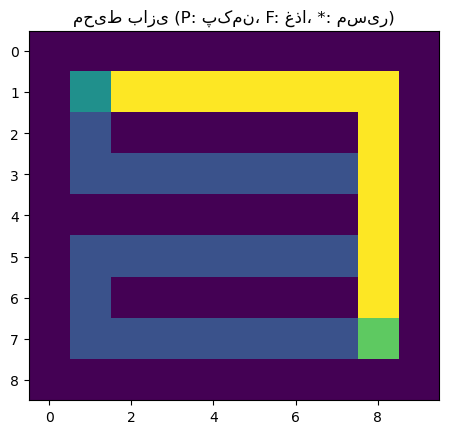

In [7]:

import numpy as np
import matplotlib.pyplot as plt
import heapq


class PriorityQueue:
    def __init__(self):
        self.elements = []
    
    def is_empty(self):
        return len(self.elements) == 0
    
    def push(self, item, priority):
        heapq.heappush(self.elements, (priority, item))
    
    def pop(self):
        return heapq.heappop(self.elements)[1]


class GameWorld:
    def __init__(self):
        # محیط بازی به صورت ماتریس: '#' = دیوار، '.' = مسیر، 'P' = پک‌من، 'F' = غذا
        self.grid = np.array([
            ['#', '#', '#', '#', '#', '#', '#', '#', '#', '#'],
            ['#', 'P', '.', '.', '.', '.', '.', '.', '.', '#'],
            ['#', '.', '#', '#', '#', '#', '#', '#', '.', '#'],
            ['#', '.', '.', '.', '.', '.', '.', '.', '.', '#'],
            ['#', '#', '#', '#', '#', '#', '#', '#', '.', '#'],
            ['#', '.', '.', '.', '.', '.', '.', '.', '.', '#'],
            ['#', '.', '#', '#', '#', '#', '#', '#', '.', '#'],
            ['#', '.', '.', '.', '.', '.', '.', '.', 'F', '#'],
            ['#', '#', '#', '#', '#', '#', '#', '#', '#', '#']
        ])
        self.start = (1, 1) 
        self.goal = (7, 8)  

    def is_valid_move(self, position):
        x, y = position
        return (0 <= x < self.grid.shape[0] and 
                0 <= y < self.grid.shape[1] and 
                self.grid[x, y] != '#')

    def get_successors(self, position):
        x, y = position
        moves = [(-1, 0), (1, 0), (0, -1), (0, 1)] 
        successors = []
        for dx, dy in moves:
            next_pos = (x + dx, y + dy)
            if self.is_valid_move(next_pos):
                successors.append((next_pos, 1)) 
        return successors

    def is_goal(self, position):
        return position == self.goal

    def display(self, path=None):
        grid = self.grid.copy()
        if path:
            for x, y in path:
                if grid[x, y] not in ['P', 'F']:
                    grid[x, y] = '*'
        plt.imshow([[0 if c == '#' else 1 if c == '.' else 2 if c == 'P' else 3 if c == 'F' else 4 for c in row] for row in grid], cmap='viridis')
        plt.title('محیط بازی (P: پک‌من، F: غذا، *: مسیر)')
        plt.show()


def null_heuristic(position, game_world):
    return 0

# تابع هیوریستیک که باید کامل شود
def manhattan_heuristic(position, game_world):
    goal_x, goal_y = game_world.goal
    x, y = position
    return abs(goal_x - x) + abs(goal_y - y)

# الگوریتم A* که باید کامل شود
def a_star_search(game_world, heuristic):
    frontier = PriorityQueue()
    start = game_world.start
    goal = game_world.goal
    frontier.push(start, 0)

    came_from = {start: None}
    cost_so_far = {start: 0}

    while not frontier.is_empty():
        current = frontier.pop()

        if game_world.is_goal(current):
            # create path
            path = []
            while current is not None:
                path.append(current)
                current = came_from[current]
            path.reverse()
            return path

        for next_pos, step_cost in game_world.get_successors(current):
            new_cost = cost_so_far[current] + step_cost
            if next_pos not in cost_so_far or new_cost < cost_so_far[next_pos]:
                cost_so_far[next_pos] = new_cost
                priority = new_cost + heuristic(next_pos, game_world)
                frontier.push(next_pos, priority)
                came_from[next_pos] = current

    return None 
    
    pass


def test_search_algorithm(game_world, search_fn, heuristic):
    print(f"اجرای {search_fn.__name__}...")
    path = search_fn(game_world, heuristic)
    if path:
        print(f"path found: {path}") # I changed this to english for more readability.
        print(f"طول مسیر: {len(path)}") 
        game_world.display(path)
    else:
        print("هیچ مسیری پیدا نشد!")


game_world = GameWorld()
game_world.display()  
test_search_algorithm(game_world, a_star_search, manhattan_heuristic)